In [1]:
%matplotlib notebook
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    
    from game import Game
    from data_preprocess import get_data_points, get_dummy_data
    from utils import get_feature_extractor_model, get_features, message_to_image, message_to_image_sm
    from agents import get_agents, get_symbol_agents
    
    import numpy as np
    import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs

Using TensorFlow backend.


In [2]:

sender_type = "aware"

n_features = 10
n_clusters = 8
n_samples = 6
n_vocab = 6

n_batches = 10
n_epochs = 1000000

n_all_features = 512

max_len = 2

img_dim = 0
img_rows = 0
img_cols = 0
img_features_len = 1

n_train_batches = 32
n_test_batches = 8
n_epochs = 10000000
action_size = 1
num_actions = n_vocab

ppo_config = "configs/ppo-big-200.json"
network_config = "configs/mlp3_network-200.json"
data_csv_path = "data_csvs/cifar_feats.csv"
feat_model_path = 'feature_extractors/feature_model.h5'
feature_model_json_path = 'feature_extractors/feature_model.json'

flip_s = False
flip_l = False
freq = 1
debug = True

log_freq = 100
test_freq = 10

In [3]:
# # Get data, prepare Agents, get feature extractor, initialize logging, create game pool

X1, Y1, n_features = get_dummy_data(n_samples = 13000, n_features=n_features, centers=n_clusters)
# Speaker, Listener = get_agents(ppo_config, network_config, sender_type, n_features, img_dim, img_features_len, n_samples, num_actions, action_size)
X1_test, Y1_test = X1[:3000,], Y1[:3000]
X1, Y1 = X1[3000:,], Y1[3000:]

Speaker, Listener = get_agents(ppo_config, network_config, sender_type, n_features, img_dim, img_features_len, n_samples, num_actions, action_size)
intermediate_layer_model = get_feature_extractor_model(feat_model_path, feature_model_json_path)

big_rewards = []
data = []
big_test_rewards = []
data_test = []
train_game_pool = []
test_game_pool = []

for i in range(n_train_batches):
    train_game_pool.append(Game(n_features, n_clusters, n_samples, n_vocab, sender_type, [X1, Y1]))

for i in range(n_test_batches):
    test_game_pool.append(Game(n_features, n_clusters, n_samples, n_vocab, sender_type, [X1_test, Y1_test]))





INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<IPython.core.display.Javascript object>


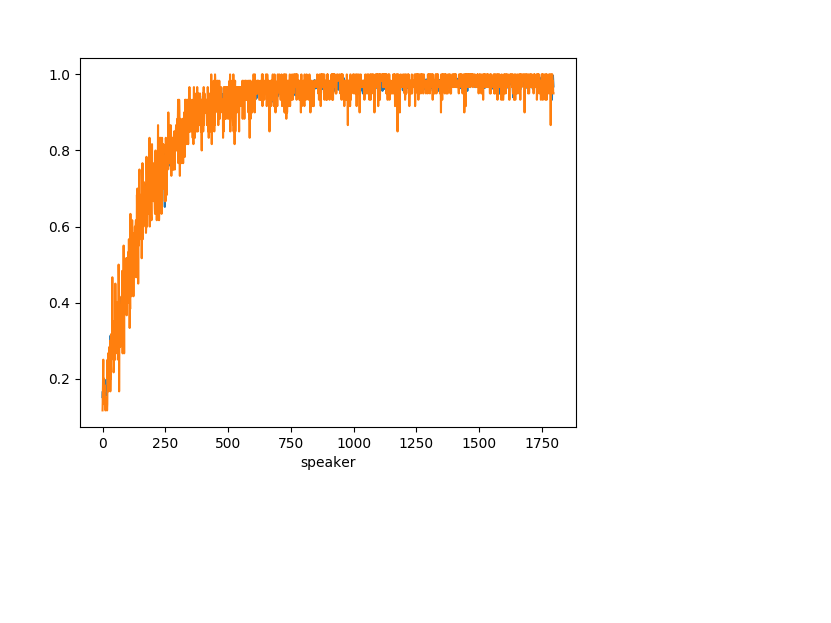

 message:  [2]  output:  3  epoch no:  0  avg reward 0.15625
Test avg reward 0.0
 epoch no:  0  avg reward 0.15625
 message:  [3]  output:  5  epoch no:  100  avg reward 0.15166666666666667
Test avg reward 0.1166647222546291
 epoch no:  100  avg reward 0.15166666666666667
 message:  [3]  output:  3  epoch no:  200  avg reward 0.16666666666666666
Test avg reward 0.14999750004166598
 epoch no:  200  avg reward 0.16666666666666666
 message:  [3]  output:  1  epoch no:  300  avg reward 0.13666666666666666
Test avg reward 0.1999966667222213
 epoch no:  300  avg reward 0.13666666666666666
 message:  [2]  output:  3  epoch no:  400  avg reward 0.18666666666666668
Test avg reward 0.24999583340277662
 epoch no:  400  avg reward 0.18666666666666668
 message:  [3]  output:  2  epoch no:  500  avg reward 0.16166666666666665
Test avg reward 0.13333111114814752
 epoch no:  500  avg reward 0.16166666666666665
 message:  [3]  output:  2  epoch no:  600  avg reward 0.19166666666666668
Test avg reward 0

 message:  [2]  output:  1  epoch no:  5500  avg reward 0.34
Test avg reward 0.3999933334444426
 epoch no:  5500  avg reward 0.34
 message:  [2]  output:  1  epoch no:  5600  avg reward 0.28833333333333333
Test avg reward 0.29999500008333196
 epoch no:  5600  avg reward 0.28833333333333333
 message:  [1]  output:  1  epoch no:  5700  avg reward 0.31666666666666665
Test avg reward 0.29999500008333196
 epoch no:  5700  avg reward 0.31666666666666665
 message:  [5]  output:  5  epoch no:  5800  avg reward 0.31166666666666665
Test avg reward 0.2833286111898135
 epoch no:  5800  avg reward 0.31166666666666665
 message:  [5]  output:  2  epoch no:  5900  avg reward 0.35
Test avg reward 0.38332694455092414
 epoch no:  5900  avg reward 0.35
 message:  [5]  output:  2  epoch no:  6000  avg reward 0.3283333333333333
Test avg reward 0.3166613889768504
 epoch no:  6000  avg reward 0.3283333333333333
 message:  [4]  output:  2  epoch no:  6100  avg reward 0.2966666666666667
Test avg reward 0.283328

 message:  [2]  output:  5  epoch no:  11000  avg reward 0.47333333333333333
Test avg reward 0.4666588890185164
 epoch no:  11000  avg reward 0.47333333333333333
 message:  [5]  output:  2  epoch no:  11100  avg reward 0.47
Test avg reward 0.38332694455092414
 epoch no:  11100  avg reward 0.47
 message:  [2]  output:  5  epoch no:  11200  avg reward 0.5166666666666667
Test avg reward 0.6333227779537008
 epoch no:  11200  avg reward 0.5166666666666667
 message:  [1]  output:  1  epoch no:  11300  avg reward 0.5
Test avg reward 0.5333244445925901
 epoch no:  11300  avg reward 0.5
 message:  [3]  output:  4  epoch no:  11400  avg reward 0.5116666666666667
Test avg reward 0.48332527791203483
 epoch no:  11400  avg reward 0.5116666666666667
 message:  [3]  output:  2  epoch no:  11500  avg reward 0.4766666666666667
Test avg reward 0.41665972233796106
 epoch no:  11500  avg reward 0.4766666666666667
 message:  [0]  output:  0  epoch no:  11600  avg reward 0.5466666666666666
Test avg reward 0

 message:  [1]  output:  4  epoch no:  16500  avg reward 0.63
Test avg reward 0.6166563890601824
 epoch no:  16500  avg reward 0.63
 message:  [3]  output:  2  epoch no:  16600  avg reward 0.6983333333333334
Test avg reward 0.716654722421293
 epoch no:  16600  avg reward 0.6983333333333334
 message:  [4]  output:  2  epoch no:  16700  avg reward 0.655
Test avg reward 0.6666555557407376
 epoch no:  16700  avg reward 0.655
 message:  [2]  output:  5  epoch no:  16800  avg reward 0.6783333333333333
Test avg reward 0.6833219446342561
 epoch no:  16800  avg reward 0.6783333333333333
 message:  [5]  output:  5  epoch no:  16900  avg reward 0.69
Test avg reward 0.6666555557407376
 epoch no:  16900  avg reward 0.69
 message:  [0]  output:  3  epoch no:  17000  avg reward 0.6883333333333334
Test avg reward 0.6999883335277746
 epoch no:  17000  avg reward 0.6883333333333334
 message:  [0]  output:  5  epoch no:  17100  avg reward 0.7033333333333334
Test avg reward 0.6999883335277746
 epoch no:  

 message:  [3]  output:  4  epoch no:  22000  avg reward 0.7683333333333333
Test avg reward 0.7333211113148115
 epoch no:  22000  avg reward 0.7683333333333333
 message:  [4]  output:  3  epoch no:  22100  avg reward 0.7083333333333334
Test avg reward 0.7333211113148115
 epoch no:  22100  avg reward 0.7083333333333334
 message:  [0]  output:  5  epoch no:  22200  avg reward 0.72
Test avg reward 0.866652222462959
 epoch no:  22200  avg reward 0.72
 message:  [1]  output:  3  epoch no:  22300  avg reward 0.715
Test avg reward 0.6666555557407376
 epoch no:  22300  avg reward 0.715
 message:  [4]  output:  1  epoch no:  22400  avg reward 0.7266666666666667
Test avg reward 0.6999883335277746
 epoch no:  22400  avg reward 0.7266666666666667
 message:  [3]  output:  1  epoch no:  22500  avg reward 0.755
Test avg reward 0.716654722421293
 epoch no:  22500  avg reward 0.755
 message:  [2]  output:  4  epoch no:  22600  avg reward 0.7266666666666667
Test avg reward 0.6166563890601824
 epoch no: 

 message:  [0]  output:  2  epoch no:  27500  avg reward 0.7883333333333333
Test avg reward 0.7333211113148115
 epoch no:  27500  avg reward 0.7883333333333333
 message:  [2]  output:  2  epoch no:  27600  avg reward 0.8
Test avg reward 0.8333194446759221
 epoch no:  27600  avg reward 0.8
 message:  [5]  output:  4  epoch no:  27700  avg reward 0.825
Test avg reward 0.7499875002083299
 epoch no:  27700  avg reward 0.825
 message:  [4]  output:  0  epoch no:  27800  avg reward 0.7833333333333333
Test avg reward 0.7499875002083299
 epoch no:  27800  avg reward 0.7833333333333333
 message:  [3]  output:  3  epoch no:  27900  avg reward 0.8133333333333334
Test avg reward 0.8333194446759221
 epoch no:  27900  avg reward 0.8133333333333334
 message:  [4]  output:  3  epoch no:  28000  avg reward 0.7916666666666666
Test avg reward 0.8333194446759221
 epoch no:  28000  avg reward 0.7916666666666666
 message:  [0]  output:  5  epoch no:  28100  avg reward 0.82
Test avg reward 0.7999866668888852

 message:  [1]  output:  5  epoch no:  33000  avg reward 0.87
Test avg reward 0.9333177780370328
 epoch no:  33000  avg reward 0.87
 message:  [5]  output:  0  epoch no:  33100  avg reward 0.8633333333333333
Test avg reward 0.8499858335694406
 epoch no:  33100  avg reward 0.8633333333333333
 message:  [3]  output:  5  epoch no:  33200  avg reward 0.88
Test avg reward 0.8833186113564774
 epoch no:  33200  avg reward 0.88
 message:  [4]  output:  4  epoch no:  33300  avg reward 0.87
Test avg reward 0.9333177780370328
 epoch no:  33300  avg reward 0.87
 message:  [4]  output:  5  epoch no:  33400  avg reward 0.8816666666666667
Test avg reward 0.8333194446759221
 epoch no:  33400  avg reward 0.8816666666666667
 message:  [3]  output:  3  epoch no:  33500  avg reward 0.825
Test avg reward 0.8166530557824037
 epoch no:  33500  avg reward 0.825
 message:  [2]  output:  2  epoch no:  33600  avg reward 0.8916666666666667
Test avg reward 0.866652222462959
 epoch no:  33600  avg reward 0.89166666

 message:  [2]  output:  1  epoch no:  38400  avg reward 0.915
Test avg reward 0.9166513891435143
 epoch no:  38400  avg reward 0.915
 message:  [2]  output:  3  epoch no:  38500  avg reward 0.9116666666666666
Test avg reward 0.8833186113564774
 epoch no:  38500  avg reward 0.9116666666666666
 message:  [4]  output:  2  epoch no:  38600  avg reward 0.8933333333333333
Test avg reward 0.866652222462959
 epoch no:  38600  avg reward 0.8933333333333333
 message:  [3]  output:  5  epoch no:  38700  avg reward 0.885
Test avg reward 0.9333177780370328
 epoch no:  38700  avg reward 0.885
 message:  [4]  output:  3  epoch no:  38800  avg reward 0.8933333333333333
Test avg reward 0.8999850002499958
 epoch no:  38800  avg reward 0.8933333333333333
 message:  [5]  output:  2  epoch no:  38900  avg reward 0.93
Test avg reward 0.9499841669305512
 epoch no:  38900  avg reward 0.93
 message:  [3]  output:  0  epoch no:  39000  avg reward 0.8916666666666667
Test avg reward 0.866652222462959
 epoch no: 

 message:  [5]  output:  4  epoch no:  44000  avg reward 0.9233333333333333
Test avg reward 0.9166513891435143
 epoch no:  44000  avg reward 0.9233333333333333
 message:  [3]  output:  0  epoch no:  44100  avg reward 0.8983333333333333
Test avg reward 0.9333177780370328
 epoch no:  44100  avg reward 0.8983333333333333
 message:  [1]  output:  5  epoch no:  44200  avg reward 0.9283333333333333
Test avg reward 0.9499841669305512
 epoch no:  44200  avg reward 0.9283333333333333
 message:  [4]  output:  2  epoch no:  44300  avg reward 0.9166666666666666
Test avg reward 0.9499841669305512
 epoch no:  44300  avg reward 0.9166666666666666
 message:  [1]  output:  5  epoch no:  44400  avg reward 0.9266666666666666
Test avg reward 0.9833169447175881
 epoch no:  44400  avg reward 0.9266666666666666
 message:  [5]  output:  3  epoch no:  44500  avg reward 0.95
Test avg reward 0.9333177780370328
 epoch no:  44500  avg reward 0.95
 message:  [1]  output:  5  epoch no:  44600  avg reward 0.9
Test av

 message:  [0]  output:  4  epoch no:  49500  avg reward 0.9483333333333334
Test avg reward 0.9666505558240697
 epoch no:  49500  avg reward 0.9483333333333334
 message:  [0]  output:  4  epoch no:  49600  avg reward 0.9433333333333334
Test avg reward 0.9166513891435143
 epoch no:  49600  avg reward 0.9433333333333334
 message:  [1]  output:  1  epoch no:  49700  avg reward 0.9433333333333334
Test avg reward 0.9666505558240697
 epoch no:  49700  avg reward 0.9433333333333334
 message:  [1]  output:  0  epoch no:  49800  avg reward 0.9566666666666667
Test avg reward 0.9499841669305512
 epoch no:  49800  avg reward 0.9566666666666667
 message:  [5]  output:  3  epoch no:  49900  avg reward 0.95
Test avg reward 0.9166513891435143
 epoch no:  49900  avg reward 0.95
 message:  [2]  output:  3  epoch no:  50000  avg reward 0.9316666666666666
Test avg reward 0.9333177780370328
 epoch no:  50000  avg reward 0.9316666666666666
 message:  [5]  output:  3  epoch no:  50100  avg reward 0.94
Test a

 message:  [0]  output:  5  epoch no:  54900  avg reward 0.9283333333333333
Test avg reward 0.9666505558240697
 epoch no:  54900  avg reward 0.9283333333333333
 message:  [5]  output:  4  epoch no:  55000  avg reward 0.9616666666666667
Test avg reward 0.9499841669305512
 epoch no:  55000  avg reward 0.9616666666666667
 message:  [2]  output:  0  epoch no:  55100  avg reward 0.945
Test avg reward 0.9166513891435143
 epoch no:  55100  avg reward 0.945
 message:  [1]  output:  3  epoch no:  55200  avg reward 0.9616666666666667
Test avg reward 0.9666505558240697
 epoch no:  55200  avg reward 0.9616666666666667
 message:  [3]  output:  2  epoch no:  55300  avg reward 0.9466666666666667
Test avg reward 0.9666505558240697
 epoch no:  55300  avg reward 0.9466666666666667
 message:  [3]  output:  4  epoch no:  55400  avg reward 0.9366666666666666
Test avg reward 0.9499841669305512
 epoch no:  55400  avg reward 0.9366666666666666
 message:  [3]  output:  0  epoch no:  55500  avg reward 0.9216666

 message:  [1]  output:  3  epoch no:  60300  avg reward 0.96
Test avg reward 0.9999833336111065
 epoch no:  60300  avg reward 0.96
 message:  [2]  output:  3  epoch no:  60400  avg reward 0.925
Test avg reward 0.9833169447175881
 epoch no:  60400  avg reward 0.925
 message:  [4]  output:  3  epoch no:  60500  avg reward 0.9666666666666667
Test avg reward 0.9666505558240697
 epoch no:  60500  avg reward 0.9666666666666667
 message:  [2]  output:  2  epoch no:  60600  avg reward 0.975
Test avg reward 0.9666505558240697
 epoch no:  60600  avg reward 0.975
 message:  [3]  output:  1  epoch no:  60700  avg reward 0.955
Test avg reward 0.8999850002499958
 epoch no:  60700  avg reward 0.955
 message:  [4]  output:  2  epoch no:  60800  avg reward 0.9666666666666667
Test avg reward 0.9999833336111065
 epoch no:  60800  avg reward 0.9666666666666667
 message:  [2]  output:  3  epoch no:  60900  avg reward 0.97
Test avg reward 0.9333177780370328
 epoch no:  60900  avg reward 0.97
 message:  [4]

 message:  [2]  output:  5  epoch no:  65900  avg reward 0.95
Test avg reward 0.9333177780370328
 epoch no:  65900  avg reward 0.95
 message:  [4]  output:  3  epoch no:  66000  avg reward 0.9666666666666667
Test avg reward 0.9833169447175881
 epoch no:  66000  avg reward 0.9666666666666667
 message:  [0]  output:  2  epoch no:  66100  avg reward 0.9666666666666667
Test avg reward 0.9833169447175881
 epoch no:  66100  avg reward 0.9666666666666667
 message:  [0]  output:  4  epoch no:  66200  avg reward 0.955
Test avg reward 0.9499841669305512
 epoch no:  66200  avg reward 0.955
 message:  [2]  output:  3  epoch no:  66300  avg reward 0.9666666666666667
Test avg reward 0.9666505558240697
 epoch no:  66300  avg reward 0.9666666666666667
 message:  [2]  output:  4  epoch no:  66400  avg reward 0.96
Test avg reward 0.9333177780370328
 epoch no:  66400  avg reward 0.96
 message:  [3]  output:  0  epoch no:  66500  avg reward 0.965
Test avg reward 0.9666505558240697
 epoch no:  66500  avg r

 message:  [3]  output:  1  epoch no:  71400  avg reward 0.96
Test avg reward 0.9999833336111065
 epoch no:  71400  avg reward 0.96
 message:  [3]  output:  1  epoch no:  71500  avg reward 0.9566666666666667
Test avg reward 0.9499841669305512
 epoch no:  71500  avg reward 0.9566666666666667
 message:  [3]  output:  3  epoch no:  71600  avg reward 0.9566666666666667
Test avg reward 0.9166513891435143
 epoch no:  71600  avg reward 0.9566666666666667
 message:  [4]  output:  0  epoch no:  71700  avg reward 0.9616666666666667
Test avg reward 0.9499841669305512
 epoch no:  71700  avg reward 0.9616666666666667
 message:  [0]  output:  2  epoch no:  71800  avg reward 0.9683333333333334
Test avg reward 0.9666505558240697
 epoch no:  71800  avg reward 0.9683333333333334
 message:  [4]  output:  0  epoch no:  71900  avg reward 0.9683333333333334
Test avg reward 0.9666505558240697
 epoch no:  71900  avg reward 0.9683333333333334
 message:  [0]  output:  0  epoch no:  72000  avg reward 0.976666666

 message:  [3]  output:  4  epoch no:  76900  avg reward 0.945
Test avg reward 0.9833169447175881
 epoch no:  76900  avg reward 0.945
 message:  [4]  output:  5  epoch no:  77000  avg reward 0.9783333333333334
Test avg reward 0.9833169447175881
 epoch no:  77000  avg reward 0.9783333333333334
 message:  [4]  output:  4  epoch no:  77100  avg reward 0.9633333333333334
Test avg reward 0.9999833336111065
 epoch no:  77100  avg reward 0.9633333333333334
 message:  [2]  output:  2  epoch no:  77200  avg reward 0.9716666666666667
Test avg reward 0.9833169447175881
 epoch no:  77200  avg reward 0.9716666666666667
 message:  [3]  output:  3  epoch no:  77300  avg reward 0.975
Test avg reward 0.9999833336111065
 epoch no:  77300  avg reward 0.975
 message:  [0]  output:  0  epoch no:  77400  avg reward 0.975
Test avg reward 0.9333177780370328
 epoch no:  77400  avg reward 0.975
 message:  [3]  output:  0  epoch no:  77500  avg reward 0.96
Test avg reward 0.9666505558240697
 epoch no:  77500  av

 message:  [4]  output:  2  epoch no:  82400  avg reward 0.9433333333333334
Test avg reward 0.9666505558240697
 epoch no:  82400  avg reward 0.9433333333333334
 message:  [4]  output:  2  epoch no:  82500  avg reward 0.965
Test avg reward 0.9999833336111065
 epoch no:  82500  avg reward 0.965
 message:  [4]  output:  3  epoch no:  82600  avg reward 0.9733333333333334
Test avg reward 0.9833169447175881
 epoch no:  82600  avg reward 0.9733333333333334
 message:  [1]  output:  1  epoch no:  82700  avg reward 0.9683333333333334
Test avg reward 0.9666505558240697
 epoch no:  82700  avg reward 0.9683333333333334
 message:  [1]  output:  4  epoch no:  82800  avg reward 0.9666666666666667
Test avg reward 0.9666505558240697
 epoch no:  82800  avg reward 0.9666666666666667
 message:  [1]  output:  3  epoch no:  82900  avg reward 0.965
Test avg reward 0.8999850002499958
 epoch no:  82900  avg reward 0.965
 message:  [0]  output:  2  epoch no:  83000  avg reward 0.975
Test avg reward 0.98331694471

 message:  [2]  output:  1  epoch no:  87800  avg reward 0.9666666666666667
Test avg reward 0.9666505558240697
 epoch no:  87800  avg reward 0.9666666666666667
 message:  [2]  output:  1  epoch no:  87900  avg reward 0.9816666666666667
Test avg reward 0.9833169447175881
 epoch no:  87900  avg reward 0.9816666666666667
 message:  [2]  output:  1  epoch no:  88000  avg reward 0.9733333333333334
Test avg reward 0.9999833336111065
 epoch no:  88000  avg reward 0.9733333333333334
 message:  [5]  output:  4  epoch no:  88100  avg reward 0.9716666666666667
Test avg reward 0.9666505558240697
 epoch no:  88100  avg reward 0.9716666666666667
 message:  [5]  output:  4  epoch no:  88200  avg reward 0.9783333333333334
Test avg reward 0.9833169447175881
 epoch no:  88200  avg reward 0.9783333333333334
 message:  [3]  output:  3  epoch no:  88300  avg reward 0.955
Test avg reward 0.9499841669305512
 epoch no:  88300  avg reward 0.955
 message:  [0]  output:  4  epoch no:  88400  avg reward 0.9366666

 message:  [0]  output:  0  epoch no:  93300  avg reward 0.96
Test avg reward 0.9833169447175881
 epoch no:  93300  avg reward 0.96
 message:  [1]  output:  4  epoch no:  93400  avg reward 0.9766666666666667
Test avg reward 0.9833169447175881
 epoch no:  93400  avg reward 0.9766666666666667
 message:  [1]  output:  2  epoch no:  93500  avg reward 0.97
Test avg reward 0.9999833336111065
 epoch no:  93500  avg reward 0.97
 message:  [0]  output:  5  epoch no:  93600  avg reward 0.9783333333333334
Test avg reward 0.9999833336111065
 epoch no:  93600  avg reward 0.9783333333333334
 message:  [2]  output:  2  epoch no:  93700  avg reward 0.9883333333333333
Test avg reward 0.9999833336111065
 epoch no:  93700  avg reward 0.9883333333333333
 message:  [1]  output:  0  epoch no:  93800  avg reward 0.97
Test avg reward 0.9833169447175881
 epoch no:  93800  avg reward 0.97
 message:  [2]  output:  1  epoch no:  93900  avg reward 0.9633333333333334
Test avg reward 0.9833169447175881
 epoch no:  9

 message:  [3]  output:  5  epoch no:  98800  avg reward 0.9666666666666667
Test avg reward 0.9999833336111065
 epoch no:  98800  avg reward 0.9666666666666667
 message:  [3]  output:  4  epoch no:  98900  avg reward 0.9716666666666667
Test avg reward 0.9999833336111065
 epoch no:  98900  avg reward 0.9716666666666667
 message:  [3]  output:  0  epoch no:  99000  avg reward 0.9683333333333334
Test avg reward 0.9333177780370328
 epoch no:  99000  avg reward 0.9683333333333334
 message:  [2]  output:  2  epoch no:  99100  avg reward 0.9833333333333333
Test avg reward 0.9666505558240697
 epoch no:  99100  avg reward 0.9833333333333333
 message:  [0]  output:  3  epoch no:  99200  avg reward 0.9683333333333334
Test avg reward 0.9499841669305512
 epoch no:  99200  avg reward 0.9683333333333334
 message:  [0]  output:  0  epoch no:  99300  avg reward 0.9516666666666667
Test avg reward 0.9499841669305512
 epoch no:  99300  avg reward 0.9516666666666667
 message:  [2]  output:  3  epoch no:  9

 message:  [1]  output:  1  epoch no:  104200  avg reward 0.975
Test avg reward 0.9833169447175881
 epoch no:  104200  avg reward 0.975
 message:  [1]  output:  0  epoch no:  104300  avg reward 0.97
Test avg reward 0.9666505558240697
 epoch no:  104300  avg reward 0.97
 message:  [2]  output:  1  epoch no:  104400  avg reward 0.9583333333333334
Test avg reward 0.9333177780370328
 epoch no:  104400  avg reward 0.9583333333333334
 message:  [5]  output:  0  epoch no:  104500  avg reward 0.9816666666666667
Test avg reward 0.9499841669305512
 epoch no:  104500  avg reward 0.9816666666666667
 message:  [5]  output:  3  epoch no:  104600  avg reward 0.9716666666666667
Test avg reward 0.9833169447175881
 epoch no:  104600  avg reward 0.9716666666666667
 message:  [1]  output:  0  epoch no:  104700  avg reward 0.955
Test avg reward 0.9666505558240697
 epoch no:  104700  avg reward 0.955
 message:  [1]  output:  0  epoch no:  104800  avg reward 0.97
Test avg reward 0.9999833336111065
 epoch no:

 message:  [3]  output:  2  epoch no:  109600  avg reward 0.975
Test avg reward 0.9666505558240697
 epoch no:  109600  avg reward 0.975
 message:  [1]  output:  5  epoch no:  109700  avg reward 0.9833333333333333
Test avg reward 0.9666505558240697
 epoch no:  109700  avg reward 0.9833333333333333
 message:  [0]  output:  0  epoch no:  109800  avg reward 0.96
Test avg reward 0.9999833336111065
 epoch no:  109800  avg reward 0.96
 message:  [2]  output:  4  epoch no:  109900  avg reward 0.9566666666666667
Test avg reward 0.9166513891435143
 epoch no:  109900  avg reward 0.9566666666666667
 message:  [2]  output:  3  epoch no:  110000  avg reward 0.9783333333333334
Test avg reward 0.9666505558240697
 epoch no:  110000  avg reward 0.9783333333333334
 message:  [1]  output:  4  epoch no:  110100  avg reward 0.9783333333333334
Test avg reward 0.9833169447175881
 epoch no:  110100  avg reward 0.9783333333333334
 message:  [4]  output:  0  epoch no:  110200  avg reward 0.9583333333333334
Test 

 message:  [3]  output:  2  epoch no:  115000  avg reward 0.9766666666666667
Test avg reward 0.9666505558240697
 epoch no:  115000  avg reward 0.9766666666666667
 message:  [5]  output:  1  epoch no:  115100  avg reward 0.9533333333333334
Test avg reward 0.9499841669305512
 epoch no:  115100  avg reward 0.9533333333333334
 message:  [0]  output:  0  epoch no:  115200  avg reward 0.9766666666666667
Test avg reward 0.9666505558240697
 epoch no:  115200  avg reward 0.9766666666666667
 message:  [0]  output:  4  epoch no:  115300  avg reward 0.9716666666666667
Test avg reward 0.9666505558240697
 epoch no:  115300  avg reward 0.9716666666666667
 message:  [0]  output:  1  epoch no:  115400  avg reward 0.9666666666666667
Test avg reward 0.9833169447175881
 epoch no:  115400  avg reward 0.9666666666666667
 message:  [2]  output:  3  epoch no:  115500  avg reward 0.9533333333333334
Test avg reward 0.9499841669305512
 epoch no:  115500  avg reward 0.9533333333333334
 message:  [0]  output:  4  

 message:  [1]  output:  5  epoch no:  120400  avg reward 0.9816666666666667
Test avg reward 0.9499841669305512
 epoch no:  120400  avg reward 0.9816666666666667
 message:  [5]  output:  5  epoch no:  120500  avg reward 0.9583333333333334
Test avg reward 0.9999833336111065
 epoch no:  120500  avg reward 0.9583333333333334
 message:  [4]  output:  2  epoch no:  120600  avg reward 0.9733333333333334
Test avg reward 0.9333177780370328
 epoch no:  120600  avg reward 0.9733333333333334
 message:  [5]  output:  5  epoch no:  120700  avg reward 0.9833333333333333
Test avg reward 0.9499841669305512
 epoch no:  120700  avg reward 0.9833333333333333
 message:  [5]  output:  3  epoch no:  120800  avg reward 0.9683333333333334
Test avg reward 0.9666505558240697
 epoch no:  120800  avg reward 0.9683333333333334
 message:  [0]  output:  4  epoch no:  120900  avg reward 0.9716666666666667
Test avg reward 0.9499841669305512
 epoch no:  120900  avg reward 0.9716666666666667
 message:  [5]  output:  0  

 message:  [1]  output:  2  epoch no:  125700  avg reward 0.9533333333333334
Test avg reward 0.9499841669305512
 epoch no:  125700  avg reward 0.9533333333333334
 message:  [0]  output:  3  epoch no:  125800  avg reward 0.9933333333333333
Test avg reward 0.9999833336111065
 epoch no:  125800  avg reward 0.9933333333333333
 message:  [1]  output:  5  epoch no:  125900  avg reward 0.98
Test avg reward 0.9333177780370328
 epoch no:  125900  avg reward 0.98
 message:  [4]  output:  2  epoch no:  126000  avg reward 0.9716666666666667
Test avg reward 0.9833169447175881
 epoch no:  126000  avg reward 0.9716666666666667
 message:  [5]  output:  0  epoch no:  126100  avg reward 0.9733333333333334
Test avg reward 0.9666505558240697
 epoch no:  126100  avg reward 0.9733333333333334
 message:  [3]  output:  4  epoch no:  126200  avg reward 0.9733333333333334
Test avg reward 0.9999833336111065
 epoch no:  126200  avg reward 0.9733333333333334
 message:  [1]  output:  3  epoch no:  126300  avg rewar

 message:  [1]  output:  2  epoch no:  131100  avg reward 0.9716666666666667
Test avg reward 0.9999833336111065
 epoch no:  131100  avg reward 0.9716666666666667
 message:  [0]  output:  4  epoch no:  131200  avg reward 0.9666666666666667
Test avg reward 0.9999833336111065
 epoch no:  131200  avg reward 0.9666666666666667
 message:  [2]  output:  5  epoch no:  131300  avg reward 0.99
Test avg reward 0.9999833336111065
 epoch no:  131300  avg reward 0.99
 message:  [5]  output:  1  epoch no:  131400  avg reward 0.9866666666666667
Test avg reward 0.9999833336111065
 epoch no:  131400  avg reward 0.9866666666666667
 message:  [5]  output:  2  epoch no:  131500  avg reward 0.9633333333333334
Test avg reward 0.9833169447175881
 epoch no:  131500  avg reward 0.9633333333333334
 message:  [0]  output:  1  epoch no:  131600  avg reward 0.975
Test avg reward 0.9333177780370328
 epoch no:  131600  avg reward 0.975
 message:  [1]  output:  4  epoch no:  131700  avg reward 0.9883333333333333
Test 

 message:  [4]  output:  5  epoch no:  136500  avg reward 0.975
Test avg reward 0.9833169447175881
 epoch no:  136500  avg reward 0.975
 message:  [0]  output:  1  epoch no:  136600  avg reward 0.9816666666666667
Test avg reward 0.9999833336111065
 epoch no:  136600  avg reward 0.9816666666666667
 message:  [4]  output:  2  epoch no:  136700  avg reward 0.965
Test avg reward 0.9666505558240697
 epoch no:  136700  avg reward 0.965
 message:  [1]  output:  2  epoch no:  136800  avg reward 0.99
Test avg reward 0.9999833336111065
 epoch no:  136800  avg reward 0.99
 message:  [3]  output:  5  epoch no:  136900  avg reward 0.975
Test avg reward 0.9999833336111065
 epoch no:  136900  avg reward 0.975
 message:  [0]  output:  3  epoch no:  137000  avg reward 0.965
Test avg reward 0.9499841669305512
 epoch no:  137000  avg reward 0.965
 message:  [2]  output:  5  epoch no:  137100  avg reward 0.955
Test avg reward 0.9833169447175881
 epoch no:  137100  avg reward 0.955
 message:  [2]  output: 

 message:  [1]  output:  4  epoch no:  142000  avg reward 0.975
Test avg reward 0.9499841669305512
 epoch no:  142000  avg reward 0.975
 message:  [4]  output:  4  epoch no:  142100  avg reward 0.9883333333333333
Test avg reward 0.9999833336111065
 epoch no:  142100  avg reward 0.9883333333333333
 message:  [1]  output:  0  epoch no:  142200  avg reward 0.9866666666666667
Test avg reward 0.9999833336111065
 epoch no:  142200  avg reward 0.9866666666666667
 message:  [1]  output:  4  epoch no:  142300  avg reward 0.9783333333333334
Test avg reward 0.9833169447175881
 epoch no:  142300  avg reward 0.9783333333333334
 message:  [2]  output:  0  epoch no:  142400  avg reward 0.9633333333333334
Test avg reward 0.9833169447175881
 epoch no:  142400  avg reward 0.9633333333333334
 message:  [2]  output:  3  epoch no:  142500  avg reward 0.9766666666666667
Test avg reward 0.9833169447175881
 epoch no:  142500  avg reward 0.9766666666666667
 message:  [5]  output:  0  epoch no:  142600  avg rew

 message:  [4]  output:  4  epoch no:  147300  avg reward 0.98
Test avg reward 0.9833169447175881
 epoch no:  147300  avg reward 0.98
 message:  [3]  output:  1  epoch no:  147400  avg reward 0.9783333333333334
Test avg reward 0.9999833336111065
 epoch no:  147400  avg reward 0.9783333333333334
 message:  [0]  output:  4  epoch no:  147500  avg reward 0.9833333333333333
Test avg reward 0.9833169447175881
 epoch no:  147500  avg reward 0.9833333333333333
 message:  [0]  output:  2  epoch no:  147600  avg reward 0.9766666666666667
Test avg reward 0.9666505558240697
 epoch no:  147600  avg reward 0.9766666666666667
 message:  [4]  output:  4  epoch no:  147700  avg reward 0.9716666666666667
Test avg reward 0.9666505558240697
 epoch no:  147700  avg reward 0.9716666666666667
 message:  [2]  output:  1  epoch no:  147800  avg reward 0.98
Test avg reward 0.9999833336111065
 epoch no:  147800  avg reward 0.98
 message:  [1]  output:  0  epoch no:  147900  avg reward 0.9816666666666667
Test av

 message:  [0]  output:  2  epoch no:  152700  avg reward 0.9833333333333333
Test avg reward 0.9999833336111065
 epoch no:  152700  avg reward 0.9833333333333333
 message:  [1]  output:  4  epoch no:  152800  avg reward 0.9816666666666667
Test avg reward 0.9999833336111065
 epoch no:  152800  avg reward 0.9816666666666667
 message:  [3]  output:  4  epoch no:  152900  avg reward 0.985
Test avg reward 0.9666505558240697
 epoch no:  152900  avg reward 0.985
 message:  [0]  output:  1  epoch no:  153000  avg reward 0.9816666666666667
Test avg reward 0.9666505558240697
 epoch no:  153000  avg reward 0.9816666666666667
 message:  [0]  output:  1  epoch no:  153100  avg reward 0.9816666666666667
Test avg reward 0.9833169447175881
 epoch no:  153100  avg reward 0.9816666666666667
 message:  [0]  output:  3  epoch no:  153200  avg reward 0.9933333333333333
Test avg reward 0.9833169447175881
 epoch no:  153200  avg reward 0.9933333333333333
 message:  [2]  output:  4  epoch no:  153300  avg rew

 message:  [1]  output:  2  epoch no:  158100  avg reward 0.9683333333333334
Test avg reward 0.9999833336111065
 epoch no:  158100  avg reward 0.9683333333333334
 message:  [0]  output:  4  epoch no:  158200  avg reward 0.9866666666666667
Test avg reward 0.9999833336111065
 epoch no:  158200  avg reward 0.9866666666666667
 message:  [0]  output:  5  epoch no:  158300  avg reward 0.9666666666666667
Test avg reward 0.9833169447175881
 epoch no:  158300  avg reward 0.9666666666666667
 message:  [2]  output:  4  epoch no:  158400  avg reward 0.9816666666666667
Test avg reward 0.9833169447175881
 epoch no:  158400  avg reward 0.9816666666666667
 message:  [5]  output:  1  epoch no:  158500  avg reward 0.9483333333333334
Test avg reward 0.9666505558240697
 epoch no:  158500  avg reward 0.9483333333333334
 message:  [3]  output:  1  epoch no:  158600  avg reward 0.9616666666666667
Test avg reward 0.9666505558240697
 epoch no:  158600  avg reward 0.9616666666666667
 message:  [0]  output:  4  

 message:  [1]  output:  5  epoch no:  163500  avg reward 0.9666666666666667
Test avg reward 0.9666505558240697
 epoch no:  163500  avg reward 0.9666666666666667
 message:  [4]  output:  3  epoch no:  163600  avg reward 0.94
Test avg reward 0.9499841669305512
 epoch no:  163600  avg reward 0.94
 message:  [2]  output:  4  epoch no:  163700  avg reward 0.975
Test avg reward 0.9666505558240697
 epoch no:  163700  avg reward 0.975
 message:  [5]  output:  1  epoch no:  163800  avg reward 0.9816666666666667
Test avg reward 0.9499841669305512
 epoch no:  163800  avg reward 0.9816666666666667
 message:  [3]  output:  0  epoch no:  163900  avg reward 0.9733333333333334
Test avg reward 0.9833169447175881
 epoch no:  163900  avg reward 0.9733333333333334
 message:  [2]  output:  2  epoch no:  164000  avg reward 0.98
Test avg reward 0.9333177780370328
 epoch no:  164000  avg reward 0.98
 message:  [5]  output:  5  epoch no:  164100  avg reward 0.97
Test avg reward 0.9999833336111065
 epoch no:  

 message:  [1]  output:  2  epoch no:  168900  avg reward 0.9916666666666667
Test avg reward 0.9999833336111065
 epoch no:  168900  avg reward 0.9916666666666667
 message:  [0]  output:  5  epoch no:  169000  avg reward 0.995
Test avg reward 0.9833169447175881
 epoch no:  169000  avg reward 0.995
 message:  [5]  output:  5  epoch no:  169100  avg reward 0.965
Test avg reward 0.9666505558240697
 epoch no:  169100  avg reward 0.965
 message:  [3]  output:  4  epoch no:  169200  avg reward 0.985
Test avg reward 0.9666505558240697
 epoch no:  169200  avg reward 0.985
 message:  [1]  output:  2  epoch no:  169300  avg reward 0.98
Test avg reward 0.9999833336111065
 epoch no:  169300  avg reward 0.98
 message:  [2]  output:  0  epoch no:  169400  avg reward 0.9716666666666667
Test avg reward 0.9833169447175881
 epoch no:  169400  avg reward 0.9716666666666667
 message:  [1]  output:  1  epoch no:  169500  avg reward 0.9866666666666667
Test avg reward 0.9833169447175881
 epoch no:  169500  av

 message:  [1]  output:  2  epoch no:  174300  avg reward 0.98
Test avg reward 0.9666505558240697
 epoch no:  174300  avg reward 0.98
 message:  [4]  output:  4  epoch no:  174400  avg reward 0.9783333333333334
Test avg reward 0.9833169447175881
 epoch no:  174400  avg reward 0.9783333333333334
 message:  [1]  output:  3  epoch no:  174500  avg reward 0.9766666666666667
Test avg reward 0.9666505558240697
 epoch no:  174500  avg reward 0.9766666666666667
 message:  [2]  output:  1  epoch no:  174600  avg reward 0.9666666666666667
Test avg reward 0.9666505558240697
 epoch no:  174600  avg reward 0.9666666666666667
 message:  [2]  output:  2  epoch no:  174700  avg reward 0.9683333333333334
Test avg reward 0.9333177780370328
 epoch no:  174700  avg reward 0.9683333333333334
 message:  [0]  output:  2  epoch no:  174800  avg reward 0.9733333333333334
Test avg reward 0.9499841669305512
 epoch no:  174800  avg reward 0.9733333333333334
 message:  [0]  output:  0  epoch no:  174900  avg rewar

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

n_batches = n_train_batches
game_pool = train_game_pool
    
for i in range(n_epochs):
    message_batch = []
    img_batch = []
#     r = i%(2*freq)
#     if r<1*freq:
#         flip_s = False
#         flip_l = True
#     if r>=1*freq:
#         flip_s = True
#         flip_l = False
    l_rewards = []
    strokes = []
    
    if (i+1)%10==0:
        test=True
        n_batches = n_test_batches
        game_pool = test_game_pool
        
    else:
        test=False
        n_batches = n_train_batches
        game_pool = train_game_pool
    
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=test)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent=test)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
        
    speaker_terminals = []
    rew_speaker = []
    
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])
    
    if not test:
        if not flip_s:
#             print('e1')
            e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
        if not flip_l:
#             print('e2')
            e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    if not test:
        big_rewards.extend(reward_batch)
        big_rewards = big_rewards[-600:]
    else:
        big_test_rewards.extend(reward_batch)
        big_test_rewards = big_rewards[-60:]
    if i%(log_freq)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        avg_test_rew = sum(big_test_rewards)/(len(big_test_rewards)+0.001)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print("Test avg reward", avg_test_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

#         if(i!=0):
#             if test:
                
#             else:
#                 data.append(avg_rew)
        if i>10:
            data.append(avg_rew)
            data_test.append(avg_test_rew)
        ax.clear()
        ax.plot(data)
        ax.plot(data_test)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break


In [36]:
data_test

[]